# **Section 1**: Twitter Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.dates as mdates
import itertools
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('/Users/chris/Library/Mobile Documents/com~apple~CloudDocs/Berkeley/COMPSS 214 Computational Social Science/Notebooks/mccabe-2020-data.csv')

df['date'] = pd.to_datetime(df['date'])

suspension_start = pd.to_datetime('2021-01-06')
suspension_end = pd.to_datetime('2021-01-12')

---

# **Section 2** Exploring the structure of the dataset


## **2.1 Define Functions**

Defining functions first allows for easier categorical data analysis.

In [2]:
# Grouping Function

def get_group_totals(group_variable_name):
    df_group = df[(df['group'] == group_variable_name)].copy()

    df_group_totals = df_group[
        (df_group["stat"] == "total")
    ].copy()

    df_group_totals = df_group_totals.drop_duplicates(subset=['date'])
    df_group_totals = df_group_totals[df_group_totals['nusers'] >= 100]

    return df_group_totals

# Histogram Function

def plot_hist(variable, group_variable_name, title="Title"):
    df_group_totals = get_group_totals(group_variable_name)
    plt.hist(df_group_totals[variable], bins=50, edgecolor='black', alpha=0.7)
    plt.ylabel('Frequency')
    plt.title(title)
    plt.yscale('log')
    plt.grid(axis='y', linestyle='--', alpha=0.7)


# Visualizing Function

def visulization_users_settings(title="Title", figsize=(16, 2)):
    plt.figure(figsize=figsize)
    plt.xlim(pd.Timestamp('2019-11-20'), pd.Timestamp('2021-6-10'))
    plt.title(title, fontsize=12)
    plt.ylabel("Num of Users", fontsize=12)

def visulization_posts_settings(df_group_totals, title="Title", figsize=(16, 2)):
    plt.figure(figsize=figsize)
    plt.xlim(pd.Timestamp('2019-11-20'), pd.Timestamp('2021-6-10'))
    plt.title(title, fontsize=12)
    plt.ylabel("Num of Tweets", fontsize=12)
    plt.bar(df_group_totals.date, df_group_totals.n, color='lightblue', label="All Tweets")
    plt.bar(
        df_group_totals.date,
        df_group_totals.fake_merged,
        color='magenta',
        alpha=0.75,
        label="Misinformation"
    )

def suspension_period():
    suspension_start = pd.to_datetime('2021-01-06')
    suspension_end = pd.to_datetime('2021-01-12')
    plt.axvline(suspension_start, color='black', linestyle='--', label='Suspension Starts (01/06/2021)')
    plt.axvline(suspension_end, color='darkgray', linestyle='--', label='Suspension Ends (01/12/2021)') 
    plt.legend(loc="best")

## **2.2 Discriptive Statistics**

In [3]:
df.shape

(32968, 29)

In [4]:
df.describe(include='all')

,date,fake_merged,fake_merged_initiation,fake_merged_rt,fake_grinberg_initiation,fake_grinberg_rt,fake_grinberg_rb_initiation,fake_grinberg_rb_rt,fake_newsguard_initiation,fake_newsguard_rt,...,not_fake_shopping,not_fake_shopping_initiation,not_fake_shopping_rt,not_fake_sports,not_fake_sports_initiation,not_fake_sports_rt,n,stat,nusers,group
count,32968,32968.000000,32968.000000,32968.000000,32968.000000,32968.000000,32968.000000,32968.000000,32968.000000,32968.000000,...,32968.000000,32968.000000,32968.000000,32968.000000,32968.000000,32968.000000,32968.000000,32968,32968.000000,32968
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,30
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,total,NaN,fns
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16484,NaN,1100
mean,2020-08-29 19:27:21.446251008,908.742582,189.598042,719.144540,58.298524,242.494367,33.991539,151.367057,180.477371,676.265363,...,355.111497,166.665689,188.445808,26.972055,9.513590,17.458465,18132.137786,NaN,9600.565821,NaN
min,2019-11-30 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN,1.000000,NaN
25%,2020-04-15 00:00:00,0.241366,0.056885,0.166247,0.010742,0.038256,0.001820,0.012547,0.051722,0.153957,...,0.036345,0.014676,0.016265,0.004292,0.000520,0.002443,5.078971,NaN,519.750000,NaN
50%,2020-08-29 00:00:00,5.023829,0.752520,4.115099,0.174269,1.272802,0.060986,0.680721,0.713376,4.000000,...,0.714898,0.127660,0.385952,0.019805,0.003257,0.012180,39.000000,NaN,1882.500000,NaN
75%,2021-01-14 00:00:00,636.000000,146.250000,458.000000,50.000000,134.000000,32.000000,68.000000,142.000000,429.000000,...,127.000000,59.000000,63.000000,16.000000,4.000000,11.000000,14768.250000,NaN,6164.250000,NaN
max,2021-05-31 00:00:00,19143.000000,3124.000000,16145.000000,1034.000000,5142.000000,706.000000,4186.000000,3033.000000,15829.000000,...,6368.000000,3544.000000,3134.000000,1026.000000,372.000000,718.000000,363619.000000,NaN,97893.000000,NaN


According to the descriptive statistics table, the dataset covers a period **from 2019-11-30 to 2021-05-31**, suggesting the data is distributed across different points within this range.

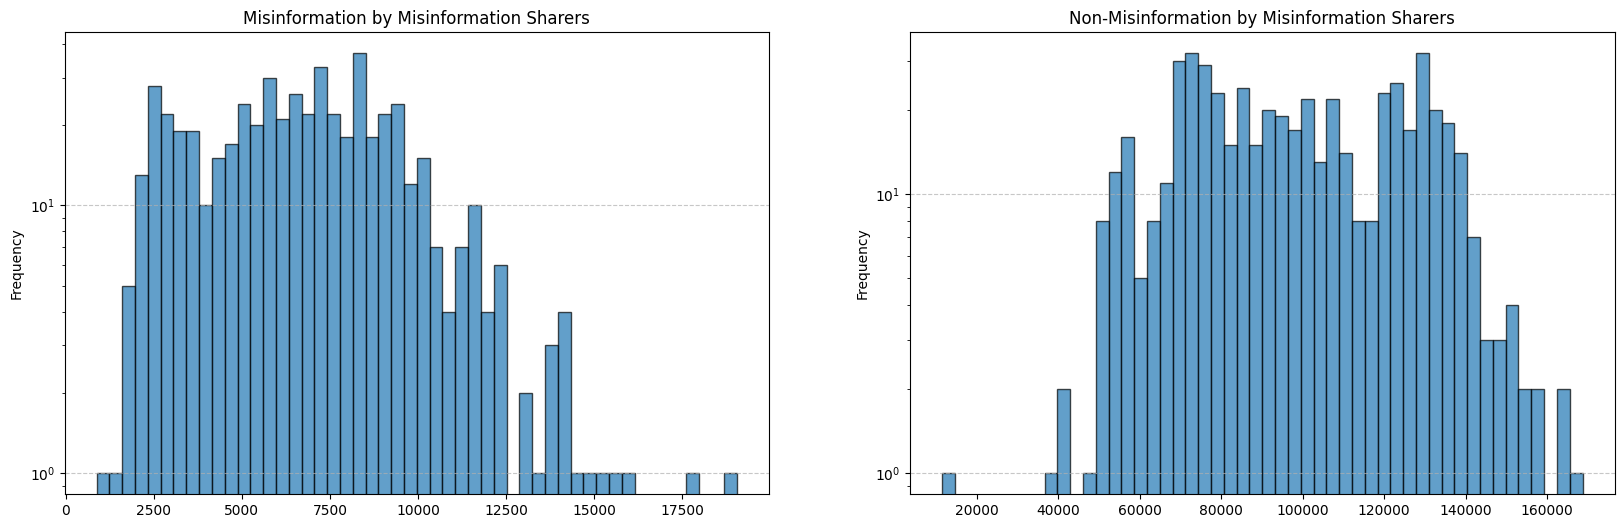

In [5]:
plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 1)
plot_hist(variable='fake_merged', group_variable_name='fns', title='Misinformation by Misinformation Sharers')

plt.subplot(1, 2, 2)
plot_hist(variable='not_fake', group_variable_name='fns', title='Non-Misinformation by Misinformation Sharers')

plt.show()

The comparison between these two histograms shows that misinformation sharers post significantly more non-misinformation content compared to misinformation. Their non-misinformation content has a broader range and higher counts, suggesting that while they engage with misinformation, it only makes up a portion of their overall activity. This indicates that misinformation sharing may be an important but not dominant part of their content creation behavior.

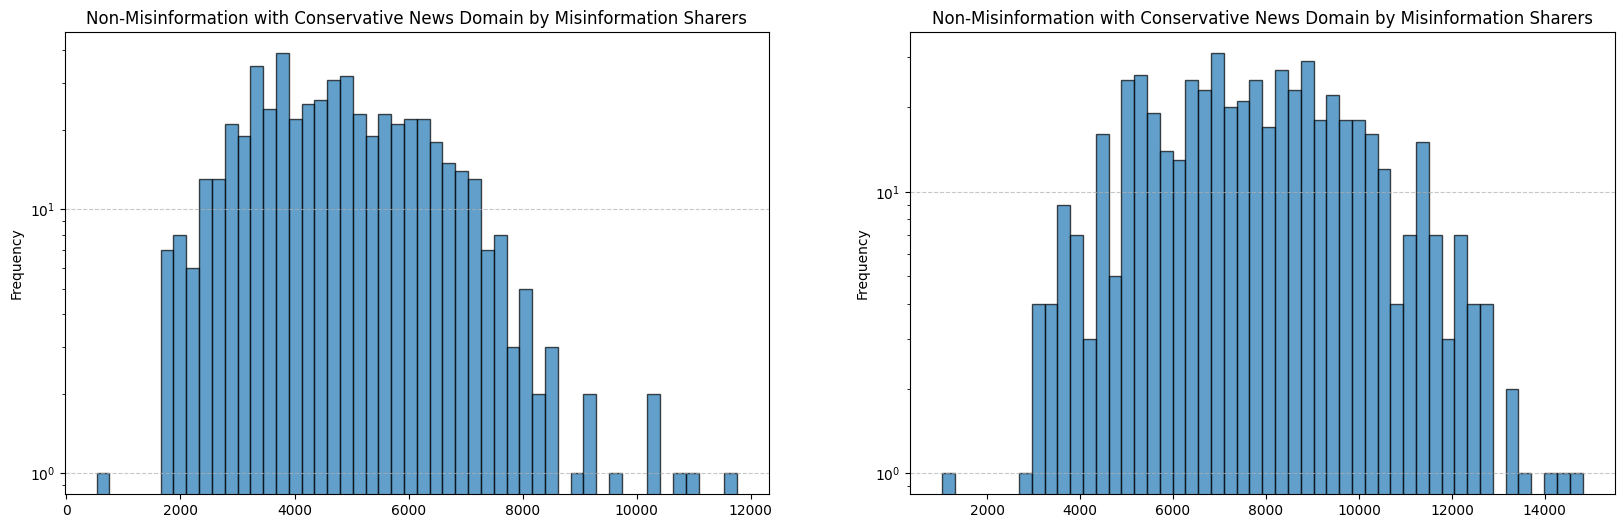

In [6]:
plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 1)
plot_hist(variable='not_fake_conservative', group_variable_name='fns', title='Non-Misinformation with Conservative News Domain by Misinformation Sharers')

plt.subplot(1, 2, 2)
plot_hist(variable='not_fake_liberal', group_variable_name='fns', title='Non-Misinformation with Conservative News Domain by Misinformation Sharers')

plt.show()

The comparison between the two histograms reveals that misinformation sharers post both conservative and liberal non-misinformation content at somewhat similar levels, with slight differences in overall volume. However, the peak activity and the spread are larger for liberal content, implying that misinformation sharers are potentially more inclined to share a higher volume of liberal news compared to conservative news, though both distributions are quite similar in their central tendencies. This suggests that misinformation sharers do not strictly adhere to one type of news ideology but spread content across both ends of the political spectrum.

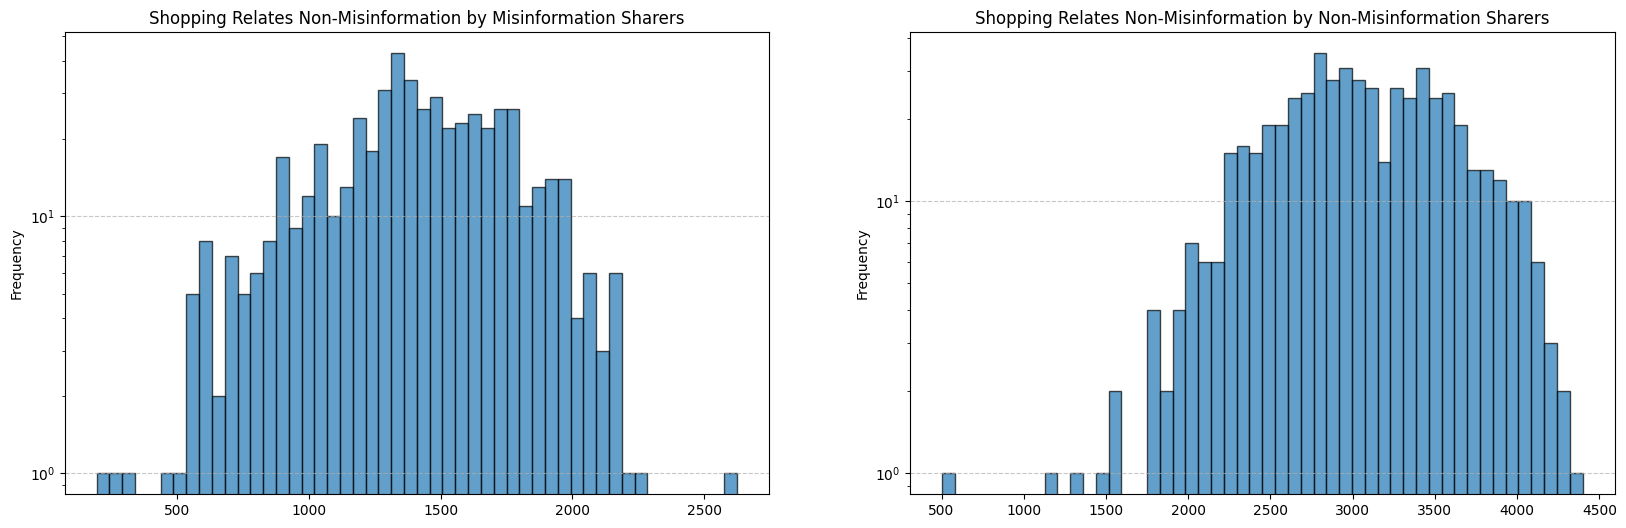

In [7]:
plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 1)
plot_hist(variable='not_fake_shopping', group_variable_name='fns', title='Shopping Relates Non-Misinformation by Misinformation Sharers')

plt.subplot(1, 2, 2)
plot_hist(variable='not_fake_shopping', group_variable_name='nfns', title='Shopping Relates Non-Misinformation by Non-Misinformation Sharers')

plt.show()

The comparison between the two histograms reveals that **non-misinformation sharers are more active in posting shopping-related content compared to misinformation sharers**. The nfns group has a higher peak frequency and a broader distribution, suggesting more frequent and diverse engagement with shopping content. In contrast, misinformation sharers have a more concentrated range, indicating more consistent but lower volume activity in this category. This might suggest differences in interests or posting behaviors between the two groups, with misinformation sharers possibly focusing less on shopping topics.

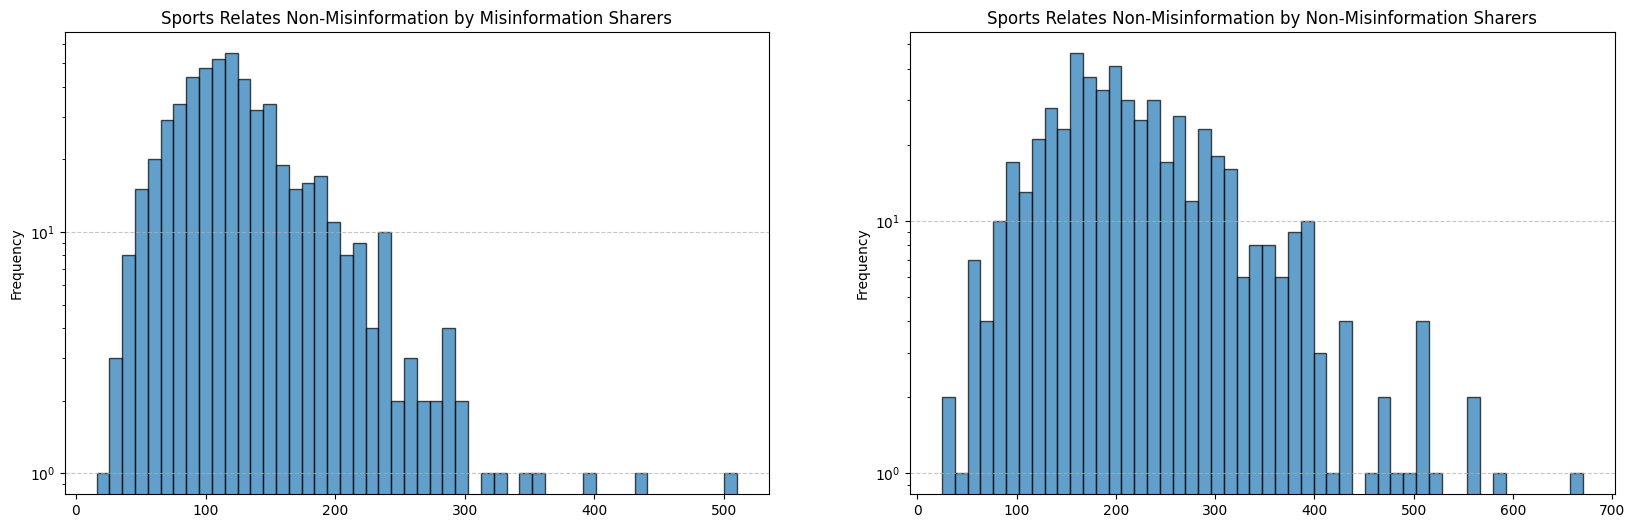

In [8]:
plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 1)
plot_hist(variable='not_fake_sports', group_variable_name='fns', title='Sports Relates Non-Misinformation by Misinformation Sharers')

plt.subplot(1, 2, 2)
plot_hist(variable='not_fake_sports', group_variable_name='nfns', title='Sports Relates Non-Misinformation by Non-Misinformation Sharers')

plt.show()

The comparison between the two histograms suggests that **non-misinformation sharers tend to have a slightly broader and more even distribution of sports-related non-misinformation content**, indicating more consistent and potentially higher engagement in this area. Misinformation sharers have a more concentrated range, indicating a lower but more consistent engagement with sports content. Overall, non-misinformation sharers tend to have a higher spread of activity in sports-related posts, reflecting more diverse interests or possibly more engagement with general topics.

## **2.3 Visualization**

### **2.2.1 Visualization of Users**

**Categorized by User Type**

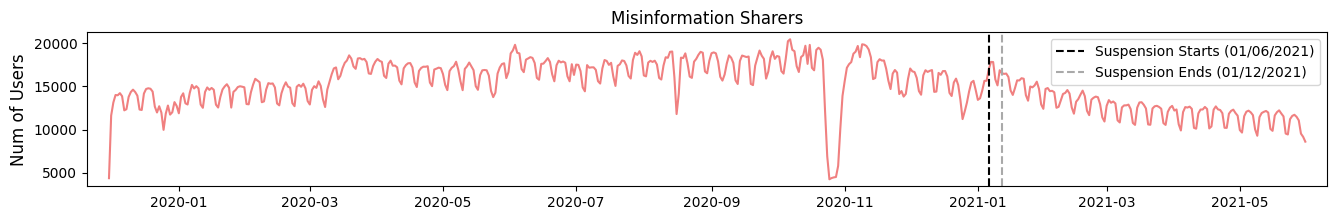

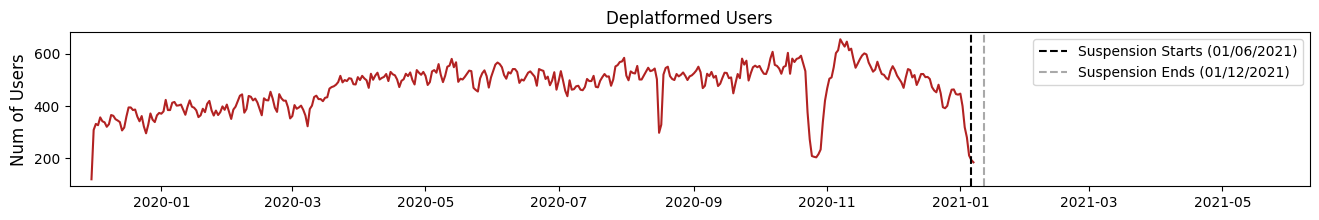

In [9]:
misinformation_sharers_totals = get_group_totals('fns')
visulization_users_settings('Misinformation Sharers')
plt.plot(misinformation_sharers_totals.date, misinformation_sharers_totals.nusers, color="lightcoral")
suspension_period()

deplatformed_users_totals = get_group_totals('suspended')
visulization_users_settings('Deplatformed Users')
plt.plot(deplatformed_users_totals.date, deplatformed_users_totals.nusers, color="firebrick")
suspension_period()

According to the plots, there is a visible decline for both groups after the deplatforming event. The trend suggests a reduction in user activity post-suspension, particularly among the deplatformed users. This provides a visual indication of the impact of deplatforming on user activity levels.

**Categorized by Activity Frequency**

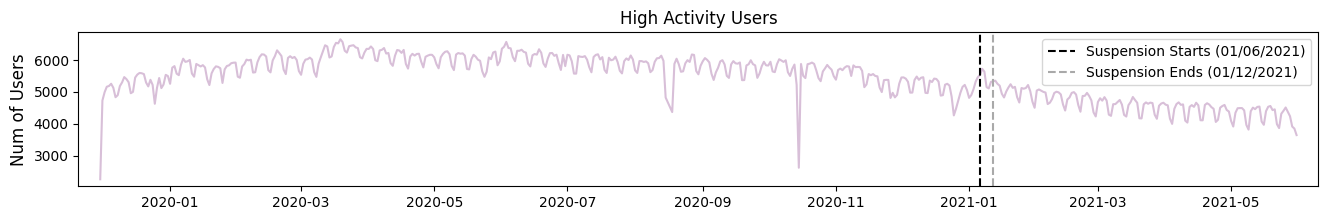

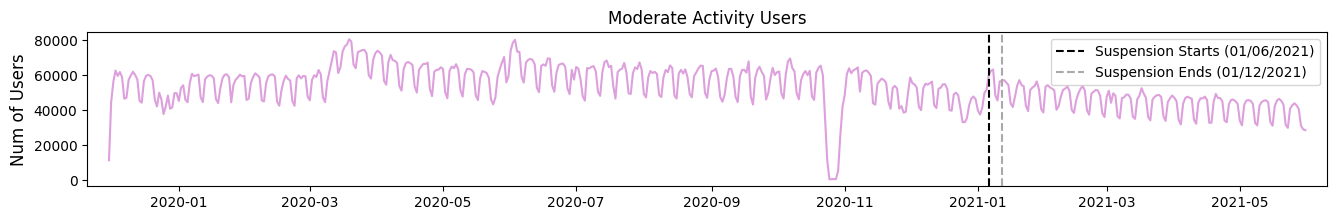

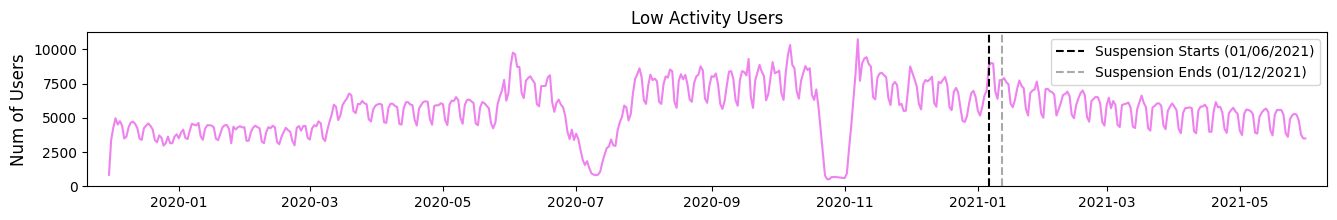

In [10]:
high_activity_totals = get_group_totals('ha')
visulization_users_settings("High Activity Users")
plt.plot(high_activity_totals.date, high_activity_totals.nusers, color="thistle")
suspension_period()

moderate_activity_totals = get_group_totals('ma')
visulization_users_settings("Moderate Activity Users")
plt.plot(moderate_activity_totals.date, moderate_activity_totals.nusers, color="plum")
suspension_period()

low_activity_totals = get_group_totals('la')
visulization_users_settings("Low Activity Users")
plt.plot(low_activity_totals.date, low_activity_totals.nusers, color="violet")
suspension_period()

The plot displays the number of active users categorized by activity level (high, moderate, and low) over time.

- **High Activity Users**: This group shows a gradual decline in the number of users after the suspension period, suggesting reduced activity post-deplatforming.
- **Moderate Activity Users**: Similar to high activity users, the moderate activity users also exhibit a slight decrease in numbers, indicating a potential impact of the intervention.
- **Low Activity Users**: There is a notable drop in activity for this group post-suspension, which aligns with the trend seen in the other activity levels.

Overall, the decline in user activity across all three levels suggests that the deplatforming intervention had an observable effect on user engagement.

**Categorized by Sharing Feature**

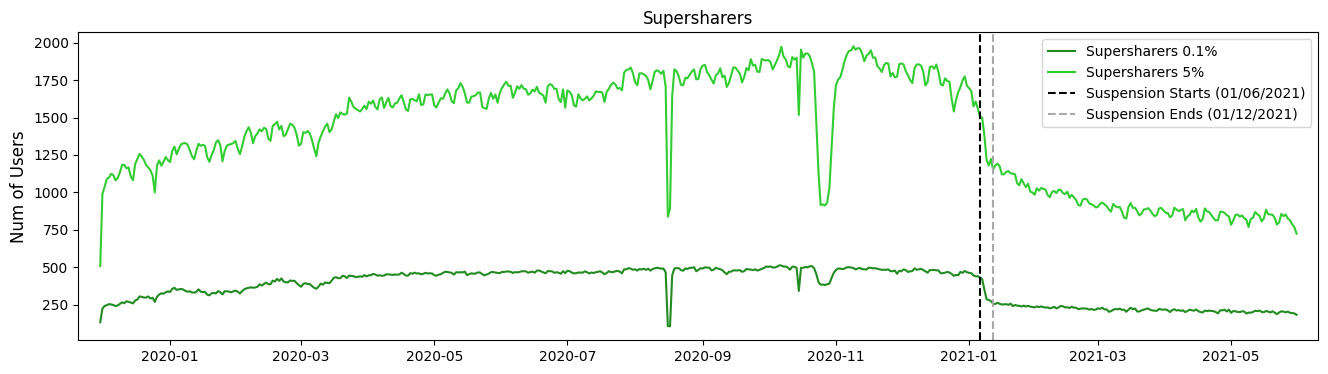

In [11]:
supersharers_1_totals = get_group_totals('ss1')
supersharers_5_totals = get_group_totals('ss5')

visulization_users_settings("Supersharers", figsize=(16, 4))
plt.plot(supersharers_1_totals.date, supersharers_1_totals.nusers,
         color="forestgreen", label="Supersharers 0.1%")
plt.plot(supersharers_5_totals.date, supersharers_5_totals.nusers,
         color="limegreen", label="Supersharers 5%")

suspension_period()

This plot illustrates the trends in the number of supersharers at two different thresholds—0.1% and 5%—over time:

- **Supersharers 0.1% (light green line)**: This group represents the top 0.1% of users based on content sharing activity. The number of supersharers steadily increased from early 2020 until early 2021, with some fluctuations throughout the year. However, following the suspension, there is a clear drop in the number of supersharers.

- **Supersharers 5% (dark green line)**: This group, defined as the top 5% of users based on their sharing activity, follows a similar trend, though at a lower absolute level. The number of these users also experienced a decline following the suspension, although the drop is less drastic compared to the 0.1% group.

**LOESS Fitting by Groups**

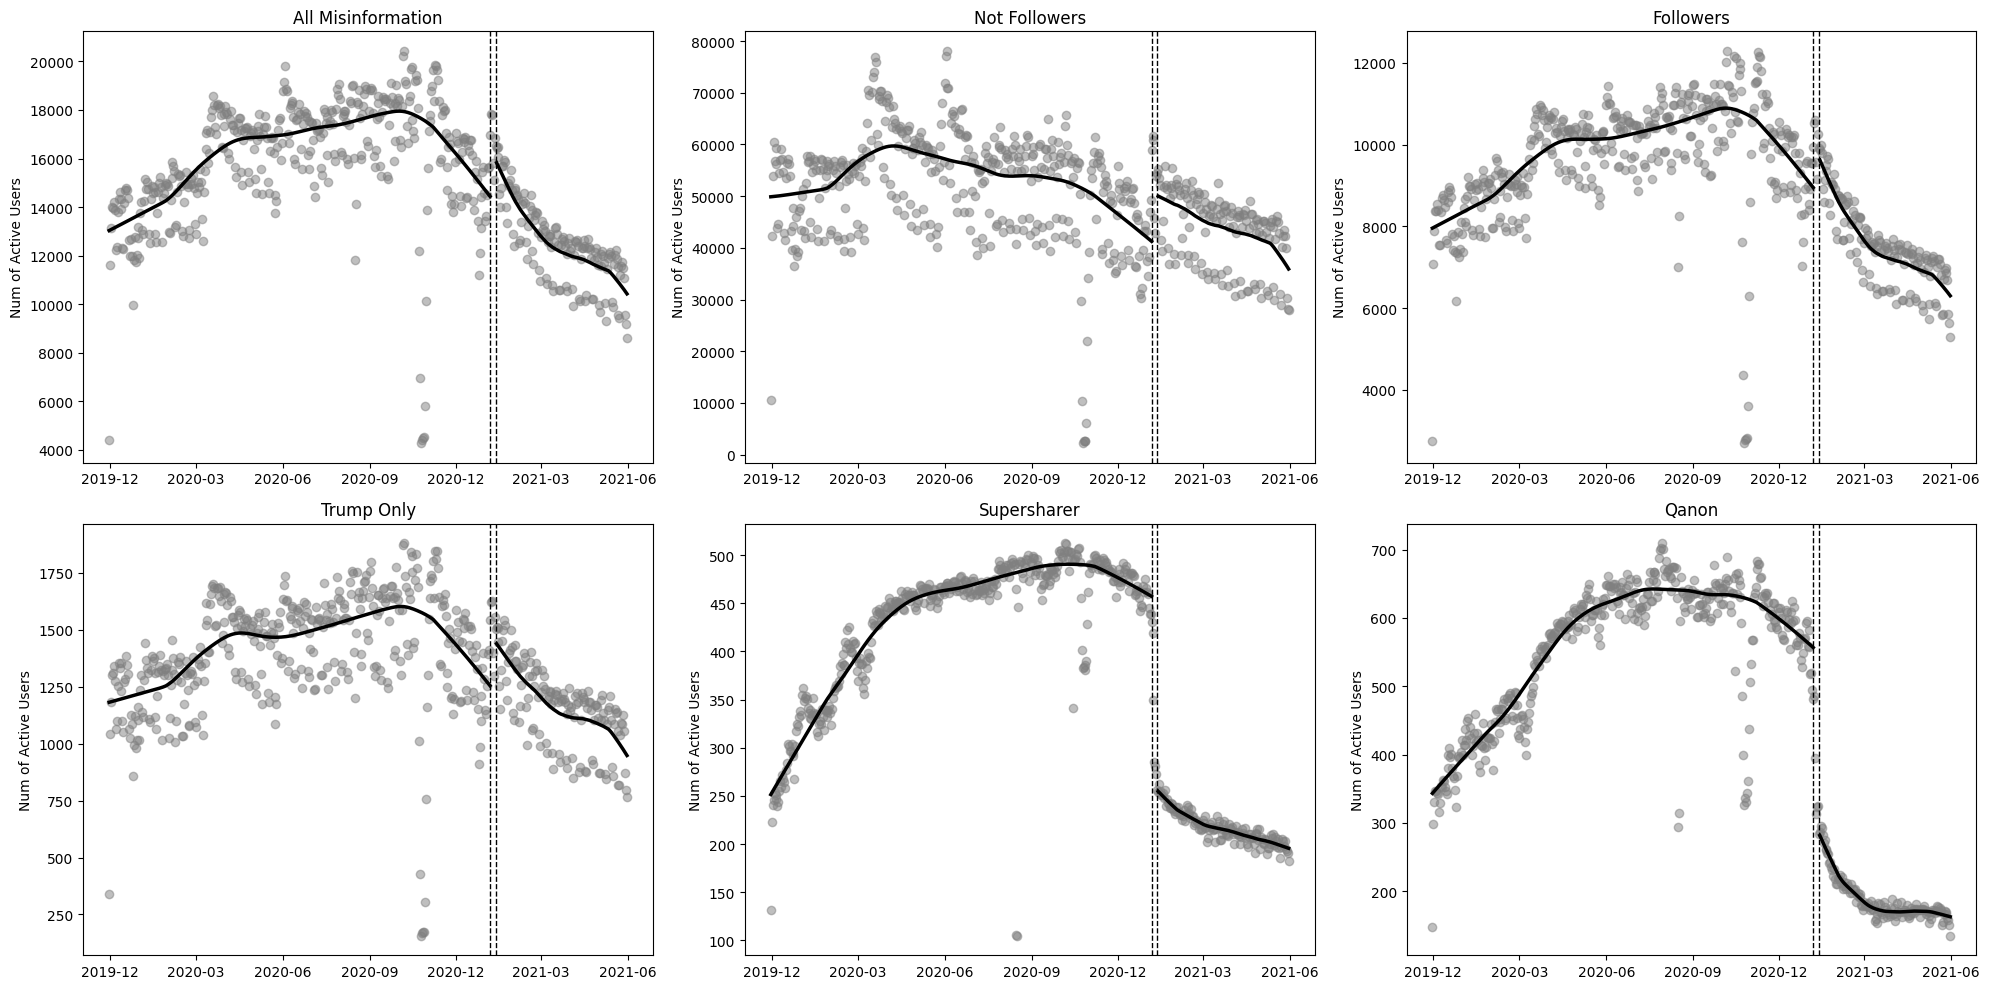

In [12]:
def plot_loess(data, title, group_variable_name, outcome_var, frac=0.3):

    subgroup_data = get_group_totals(group_variable_name)
    
    # Split data into pre- and post-intervention
    pre_data = subgroup_data[subgroup_data['date'] <= suspension_start]
    post_data = subgroup_data[subgroup_data['date'] > suspension_end]
    
    # Convert dates to ordinal for LOESS fitting
    pre_data = pre_data.assign(date_ordinal=pre_data['date'].map(lambda x: x.toordinal()))
    post_data = post_data.assign(date_ordinal=post_data['date'].map(lambda x: x.toordinal()))
    
    # Fit LOESS model for pre- and post-intervention periods
    pre_loess = sm.nonparametric.lowess(pre_data[outcome_var], pre_data['date_ordinal'], frac=frac)
    post_loess = sm.nonparametric.lowess(post_data[outcome_var], post_data['date_ordinal'], frac=frac)
    
    # Plot the data
    plt.scatter(subgroup_data['date'], subgroup_data[outcome_var], color='gray', alpha=0.5, label='Actual Data')
    plt.plot(pre_data['date'], pre_loess[:, 1], color='black', linewidth=2.5, label='LOESS Smoothed (Pre-Intervention)')
    plt.plot(post_data['date'], post_loess[:, 1], color='black', linewidth=2.5, linestyle='-', label='LOESS Smoothed (Post-Intervention)')
    plt.axvline(suspension_start, color='black', linestyle='--', linewidth=1)
    plt.axvline(suspension_end, color='black', linestyle='--', linewidth=1)

    # Set x-axis date format and frequency
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
    
    plt.title(f'{title}')
    plt.ylabel('Num of Active Users')
    plt.tight_layout()


plt.figure(figsize=(20, 10))

plt.subplot(2, 3, 1)
plot_loess(df, 'All Misinformation', 'fns', 'nusers')

plt.subplot(2, 3, 2)
plot_loess(df, 'Not Followers', 'nfns', 'nusers')

plt.subplot(2, 3, 3)
plot_loess(df, 'Followers', 'B', 'nusers')

plt.subplot(2, 3, 4)
plot_loess(df, 'Trump Only', 'A', 'nusers')

plt.subplot(2, 3, 5)
plot_loess(df, 'Supersharer', 'ss1', 'nusers')

plt.subplot(2, 3, 6)
plot_loess(df, 'Qanon', 'qanon', 'nusers')
plt.show()


The six figures collectively show that **deplatforming had a significant impact on user activity**, both directly on those who followed deplatformed accounts and indirectly on those who did not. Across all subgroups—including misinformation sharers, followers of deplatformed accounts, Trump-only followers, supersharers, and QAnon users—there is a clear trend of declining user activity after the deplatforming intervention.

The **direct effect** of deplatforming is evident in the sharp reduction of active users among those who followed deplatformed accounts. The significant drop in activity for these users highlights that the intervention was effective in limiting the spread of misinformation within the networks most closely tied to deplatformed individuals.

In addition to the direct effect, the figures reveal a notable **spillover effect**. Even among users who were not directly following the deplatformed accounts, there was a substantial decline in activity. This suggests that deplatforming not only impacted the targeted individuals but also had a broader influence, reducing misinformation engagement across the entire platform.

### **2.2.2 Visualization of Posts**

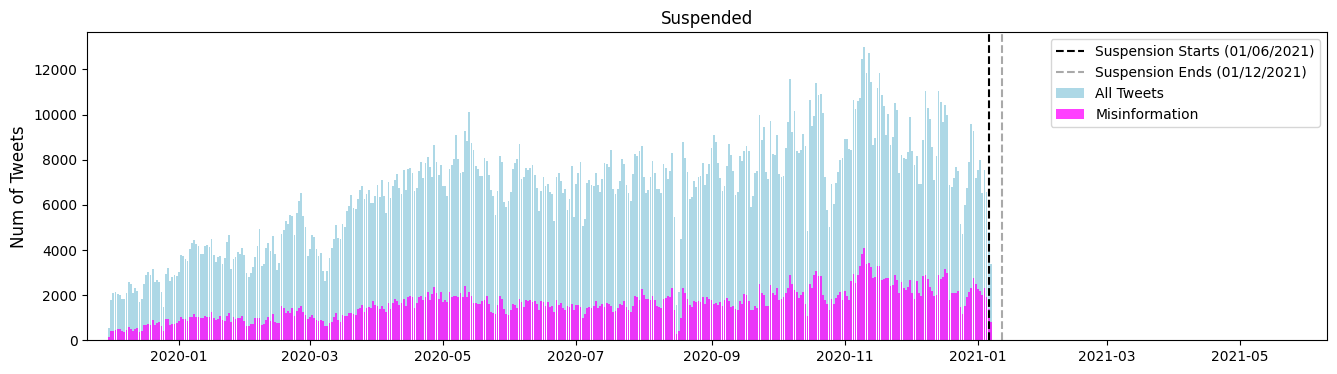

In [13]:
visulization_posts_settings(get_group_totals('suspended'), "Suspended", figsize=(16, 4))
suspension_period()

The impact of the suspension is clear, as there is an immediate drop in both general tweets and misinformation tweets, suggesting that the suspension effectively curtailed the spread of misinformation by these users. The post-suspension trend shows that tweet volumes and misinformation remained relatively low, indicating a sustained effect of the suspension policy.

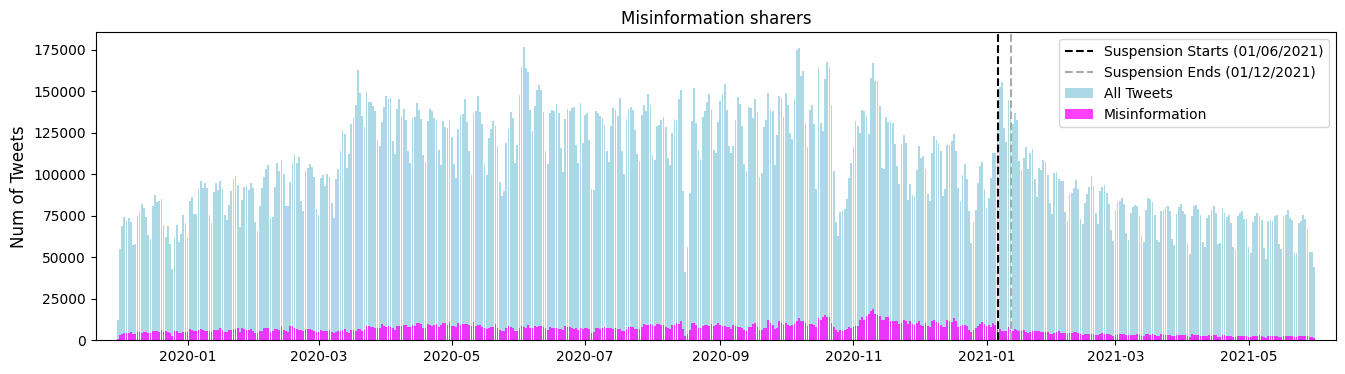

In [14]:
visulization_posts_settings(get_group_totals('fns'), "Misinformation sharers", figsize=(16, 4))
suspension_period()

This pattern highlights the effectiveness of the suspension in reducing both overall content and specifically misinformation from misinformation sharers. The sustained lower levels of tweet volume and misinformation post-suspension further indicate the long-term impact of this policy intervention.

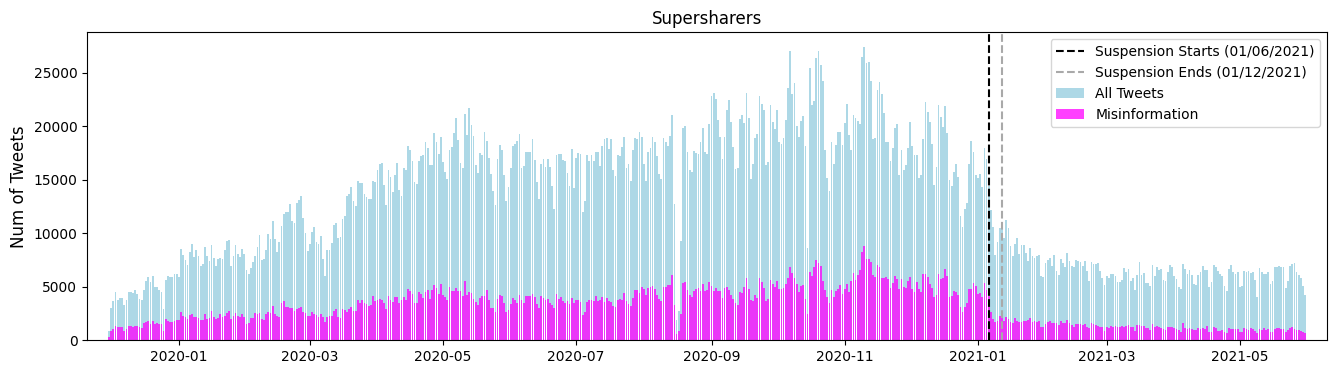

In [15]:
visulization_posts_settings(supersharers_1_totals, "Supersharers", figsize=(16, 4))
suspension_period()

The impact of the suspension is clearly visible as a steep drop in both overall tweet volume and misinformation tweets following January 2021. This suggests that the platform's suspension intervention effectively curbed the overall activity of supersharers, including the spread of misinformation. The decline in misinformation appears to be consistent with the overall decline in tweets, indicating that the reduction affected all content types shared by supersharers.

---

# **Section 3** Replication of Main DiD Results

## **3.1 Main DiD**

I analyzed the impact of deplatforming by considering **misinformation sharers (`fns`)** as the treatment group and **non-misinformation sharers (`nfns`)** as the control group.

$$
\text{Y}_{it} = \alpha + \beta_1 \text{Treat}_i + \beta_2 \text{Post}_t + \beta_3 (\text{Treat}_i \times \text{Post}_t) + \epsilon_{it}
$$

$$
\text{Y}_{it} = \alpha + \beta_1 \text{fns}_i + \beta_2 \text{Post}_t + \beta_3 (\text{fns}_i \times \text{Post}_t) + \epsilon_{it}
$$

In [18]:
# select control group & treatment group

df_did = df[(df['group'] == 'fns') | (df['group'] == 'nfns')].copy()

# post, treatment and interation
df_did['post'] = (df_did['date'] > suspension_start).astype(int)
df_did['treatment'] = (df_did['group'] == 'fns').astype(int)
df_did['interaction'] = df_did['treatment'] * df_did['post']

In [17]:
# define did function

def difference_in_differences(outcome):

    X = sm.add_constant(df_did[['treatment', 'post', 'interaction']])
    y = df_did[outcome]

    # Fit the DID model
    model = sm.OLS(y, X).fit()

    # Display the summary of the DID analysis
    model_summary = model.summary()
    print(model_summary)  


Same as McCabe, I choose **misinformation retweets (`fake_merged_rt`)** as the variable because retweeting represents a significant aspect of misinformation spread.

In [19]:
difference_in_differences(outcome = 'fake_merged_rt')  

                            OLS Regression Results                            
Dep. Variable:         fake_merged_rt   R-squared:                       0.293
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     303.7
Date:                Fri, 18 Oct 2024   Prob (F-statistic):          6.43e-165
Time:                        16:38:57   Log-Likelihood:                -20055.
No. Observations:                2200   AIC:                         4.012e+04
Df Residuals:                    2196   BIC:                         4.014e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         126.5185     77.444      1.634      

The difference-in-differences (DiD) analysis showed the following results:

- The R-squared value is **0.293**, indicating that approximately 29.3% of the variance in the outcome (`fake_merged_rt`) is explained by the model, which is a relatively high value.
- The coefficient for `treatment` is 3063.146, which is statistically significant (p < 0.05). This indicates that misinformation sharers (treatment group) had a significantly higher level of misinformation retweets compared to the control group.
- The `post` coefficient is not statistically significant, suggesting that there was no significant change in the outcome variable for both groups after the intervention.
- The interaction term (`treatment * post`) has a coefficient of **-1893.418**, which is statistically significant **(p < 0.05)**. This negative value indicates that the deplatforming intervention led to a significant reduction in misinformation retweets for the treatment group relative to the control group.

Overall, the DiD analysis suggests that **deplatforming had a significant effect in reducing misinformation retweets among the treatment group**.


## **3.2 Standarized DiD**

In [53]:
outcome_list = list(df.columns)
outcome_list = [item for item in outcome_list if item not in ['date', 'stat', 'group']]

scaler = StandardScaler()

df_std = df[outcome_list].copy()
df_std = pd.DataFrame(scaler.fit_transform(df_std), columns=outcome_list)
df_std = pd.concat([df_std, df.drop(columns=outcome_list)], axis=1)

df_std.head()

,fake_merged,fake_merged_initiation,fake_merged_rt,fake_grinberg_initiation,fake_grinberg_rt,fake_grinberg_rb_initiation,fake_grinberg_rb_rt,fake_newsguard_initiation,fake_newsguard_rt,not_fake,...,not_fake_shopping_initiation,not_fake_shopping_rt,not_fake_sports,not_fake_sports_initiation,not_fake_sports_rt,n,nusers,date,stat,group
0,-0.017492,0.024266,-0.027724,0.128723,-0.065325,0.108602,-0.037174,0.020387,-0.015820,-0.149905,...,-0.232162,-0.121595,-0.155707,-0.098536,-0.182294,-0.145660,-0.289607,2019-11-30,total,fns
1,1.282106,1.639947,1.180985,1.628989,1.285559,1.166350,1.097470,1.570545,1.099316,0.900039,...,0.088620,0.483583,1.022163,0.920695,1.046149,0.932123,0.112742,2019-12-01,total,fns
2,1.417924,2.070968,1.242031,1.817547,0.989248,1.451129,0.911144,2.020416,1.209470,1.250326,...,0.268785,0.469932,0.780912,1.077500,0.593565,1.277135,0.196280,2019-12-02,total,fns
3,1.697853,2.375521,1.513204,2.301239,1.248750,2.047807,1.141966,2.361884,1.505252,1.393554,...,0.152337,0.813473,0.922824,1.234304,0.722875,1.429180,0.244357,2019-12-03,total,fns
4,1.828487,2.349712,1.681562,2.038898,1.708861,1.369763,1.080784,2.323943,1.679322,1.315024,...,0.207266,0.206020,1.376942,1.704718,1.153907,1.359711,0.242689,2019-12-04,total,fns


In [67]:
df_std = df[(df['group'] == 'fns') | (df['group'] == 'nfns')].copy()

# post, treatment and interation
df_std['post'] = (df_std['date'] > suspension_start).astype(int)
df_std['treatment'] = (df_std['group'] == 'fns').astype(int)
df_std['interaction'] = df_std['treatment'] * df_did['post']

In [68]:
def did_std(outcome):

    X = sm.add_constant(df_std[['treatment', 'post', 'interaction']])
    y = df_std[outcome]

    # Fit the DID model
    model = sm.OLS(y, X).fit()

    # Display the summary of the DID analysis
    model_summary = model.summary()
    print(model_summary)  

In [69]:
did_std(outcome = 'fake_merged_rt')

                            OLS Regression Results                            
Dep. Variable:         fake_merged_rt   R-squared:                       0.293
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     303.7
Date:                Fri, 18 Oct 2024   Prob (F-statistic):          6.43e-165
Time:                        17:36:41   Log-Likelihood:                -20055.
No. Observations:                2200   AIC:                         4.012e+04
Df Residuals:                    2196   BIC:                         4.014e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         126.5185     77.444      1.634      

The standardized Difference-in-Differences (DiD) analysis shows a significant reduction in misinformation retweets for the treatment group following the intervention, as indicated by the highly significant negative interaction term **(-1893.4, p = 0.000)**. This suggests that the intervention led to a substantial decrease in retweeted misinformation for the treatment group compared to the control group.

## **3.3 Subgroup DiD**

In addition to the main DiD analysis, I also conducted subgroup analysis to explore the effects within specific categories of the data.

In [19]:
# define did function


def did_subgroup(outcome='fake_merged_rt', treatment='fns', control='nfns'):

    df_subgroup = df[(df['group'] == treatment) | (df['group'] == control)].copy()

    df_subgroup['post'] = (df_subgroup['date'] > suspension_start).astype(int)
    df_subgroup['treatment'] = (df_subgroup['group'] == treatment).astype(int)
    df_subgroup['interaction'] = df_subgroup['treatment'] * df_subgroup['post']

    X = sm.add_constant(df_subgroup[['treatment', 'post', 'interaction']])
    y = df_subgroup[outcome]

    # Fit the DID model
    model = sm.OLS(y, X).fit()

    coef = model.params['interaction']
    conf_int = model.conf_int().loc['interaction']
    
    return coef, conf_int[0], conf_int[1]

In [20]:
subgroup1 = [
    {'user_subgroups': 'Trump-only followers', 'group_name': 'A'},
    {'user_subgroups': 'Followers (>0)', 'group_name': 'B'},
    {'user_subgroups': 'Followers (>=4)', 'group_name': 'D'}
]

subgroup2 = [
    {'activity': 'High', 'activity_name': '_ha'},
    {'activity': 'Moderate', 'activity_name': '_ma'},
    {'activity': 'Low', 'activity_name': '_la'},
    {'activity': 'Combined', 'activity_name': ''}
]

combined = list(itertools.product(subgroup1, subgroup2))

subgroups = [
    {
        'user_subgroups': group1['user_subgroups'],
        'activity': group2['activity'],
        'variable_name': f"{group1['group_name']}{group2['activity_name']}"
    } for group1, group2 in combined
]

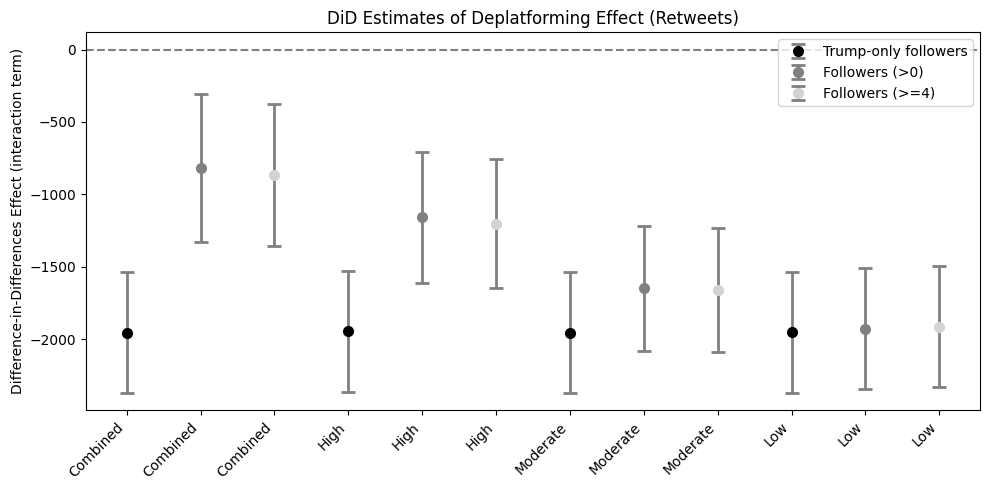

In [21]:
# Store the coefficients and confidence intervals
results = []
for subgroup in subgroups:
    coef, conf_low, conf_high = did_subgroup(
        outcome='fake_merged_rt',
        control=subgroup['variable_name']
    )
    results.append({
        'user_subgroups': subgroup['user_subgroups'],
        'activity': subgroup['activity'],
        'coef': coef,
        'conf_low': conf_low,
        'conf_high': conf_high
    })

# Extract results for plotting
colors = {'Trump-only followers': 'black', 'Followers (>0)': 'gray', 'Followers (>=4)': 'lightgray'}
labels = [f"{result['activity']}" for result in results]
coefs = [result['coef'] for result in results]
conf_lows = [result['coef'] - result['conf_low'] for result in results]
conf_highs = [result['conf_high'] - result['coef'] for result in results]

# Sort results by activity level
activity_order = ['Combined', 'High', 'Moderate', 'Low']
sorted_indices = sorted(range(len(results)), key=lambda i: activity_order.index(results[i]['activity']))
labels = [labels[i] for i in sorted_indices]
coefs = [coefs[i] for i in sorted_indices]
conf_lows = [conf_lows[i] for i in sorted_indices]
conf_highs = [conf_highs[i] for i in sorted_indices]
results = [results[i] for i in sorted_indices]

# Plotting the results
fig, ax = plt.subplots(figsize=(10, 5))
x = np.arange(len(labels))

# Plot the estimates and confidence intervals, grouped by activity level
for user_subgroup in colors.keys():
    indices = [i for i, result in enumerate(results) if result['user_subgroups'] == user_subgroup]
    ax.errorbar(
        x[indices], [coefs[i] for i in indices],
        yerr=[[conf_lows[i] for i in indices], [conf_highs[i] for i in indices]],
        fmt='o', color=colors[user_subgroup], ecolor='gray', capsize=5, elinewidth=2, markeredgewidth=2,
        label=user_subgroup
    )

ax.axhline(y=0, color='gray', linestyle='--')

# Set labels and title
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha="right")
ax.set_ylabel('Difference-in-Differences Effect (interaction term)')
ax.set_title('DiD Estimates of Deplatforming Effect (Retweets)')
ax.legend()

plt.tight_layout()
plt.show()


### **3.3.1 QAnon Users**

In [22]:
did_subgroup('fake_merged_rt', 'qanon', 'nfns')

(np.float64(-913.6045948513552),
 np.float64(-1067.9165424071089),
 np.float64(-759.2926472956016))

The Difference-in-Differences (DiD) analysis evaluates the impact of deplatforming on misinformation retweets (`fake_merged_rt`) for the treatment group (`qanon`) compared to the control group (`nfns`). The results indicate that QAnon users had significantly higher levels of misinformation retweets before the intervention, with a coefficient of 1057.82. After deplatforming, while there was no significant change in the control group, there was a substantial reduction in misinformation retweets by QAnon users, as indicated by the interaction term coefficient of **-913.60**.

**This suggests that deplatforming was effective in significantly reducing the spread of misinformation specifically among QAnon users, demonstrating a targeted impact of the intervention.**

### **3.3.2 Anti-Vax Users**

In [23]:
did_subgroup('fake_merged_rt', 'av', 'nfns')

(np.float64(-715.3431340282443),
 np.float64(-845.2506456698381),
 np.float64(-585.4356223866505))

The Difference-in-Differences (DiD) analysis examines the impact of deplatforming on misinformation retweets (`fake_merged_rt`) for the treatment group - users who tweeted or retweeted at least five distinct anti-vax hashtags (`av`) - compared to the control group (`nfns`). The treatment coefficient is 841.44, which is statistically significant, indicating that the treatment group had a significantly higher number of misinformation retweets compared to the control group before the intervention. The post coefficient is not statistically significant, suggesting no substantial overall change in misinformation retweets for both groups after the intervention. The interaction term coefficient is significantly **-715.34**, suggesting that the deplatforming led to a significant reduction in misinformation retweets specifically for the treatment group relative to the control group. 

**This indicates that the deplatforming effectively reduced the spread of misinformation among users engaged with anti-vax content.**

### **3.3.3 Trump-Only Followers**

In [24]:
did_subgroup('fake_merged_rt', 'A', 'nfns')

(np.float64(60.32908288166817),
 np.float64(35.357314894357884),
 np.float64(85.30085086897846))

This Difference-in-Differences (DiD) model assesses the effect of deplatforming on misinformation retweets (`fake_merged_rt`) for the treatment group - trump-only followers (`A`) - compared to the control group (`nfns`). The coefficient for the treatment variable is -63.06, which is statistically significant, suggesting that before the intervention, Trump-only followers retweeted misinformation less than the control group. The post variable has a coefficient of -54.18, also statistically significant, indicating an overall reduction in misinformation retweets after the deplatforming intervention for both groups. The interaction term coefficient is **60.33**, which is statistically significant and positive, suggesting that, following deplatforming, misinformation retweets increased significantly for Trump-only followers compared to the control group. 

**This result implies that the deplatforming may have had unintended consequences, increasing misinformation activity specifically among Trump-only followers.**

---

# **Section 4** Extensions and follow up analyses

## **4.1 Robustness Check**

### **4.1.1 Replacing Key Variable**

To test the robustness of the model, I conducted a robustness check by replacing the key variable from **misinformation retweets (`fake_merged_rt`)** to **total misinformation engagement (`fake_merged`)** and **misinformation tweets (`fake_merge_initiation`)**.

In [25]:
difference_in_differences(outcome = 'fake_merged')

                            OLS Regression Results                            
Dep. Variable:            fake_merged   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     302.2
Date:                Fri, 18 Oct 2024   Prob (F-statistic):          3.07e-164
Time:                        15:53:32   Log-Likelihood:                -20537.
No. Observations:                2200   AIC:                         4.108e+04
Df Residuals:                    2196   BIC:                         4.110e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         184.1480     96.386      1.911      

Both the original model and the robustness check model indicate a significant reduction in misinformation activity among the treatment group after the intervention. The similarity in the **coefficients (-1893.418 and -2167.613)** and **significance levels (p<0.01)** across both models supports the robustness of the findings. The **R-squared values (0.293 and 0.292)** are almost identical, suggesting that both models explain the variance in misinformation activity equally well. The consistency of results implies that the impact of deplatforming on reducing misinformation activity is robust, regardless of whether the focus is on retweets (`fake_merged_rt`) or total engagements (`fake_merged`).

In [26]:
difference_in_differences(outcome = 'fake_merged_initiation')

                              OLS Regression Results                              
Dep. Variable:     fake_merged_initiation   R-squared:                       0.282
Model:                                OLS   Adj. R-squared:                  0.281
Method:                     Least Squares   F-statistic:                     287.4
Date:                    Fri, 18 Oct 2024   Prob (F-statistic):          2.29e-157
Time:                            15:53:32   Log-Likelihood:                -17017.
No. Observations:                    2200   AIC:                         3.404e+04
Df Residuals:                        2196   BIC:                         3.406e+04
Df Model:                               3                                         
Covariance Type:                nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const     

The robustness check replaces the dependent variable from "fake retweets" to "fake tweet initiations" (`fake_merged_initiation`), examining whether the effect of deplatforming holds when focusing on users initiating fake content rather than retweeting. The negative and significant interaction term **(-274.20, p < 0.001)** suggests that the deplatforming effect reduced the initiation of fake tweets, which aligns with the results of the original analysis using retweets. Since similar patterns of reduced misinformation activity are observed across both metrics (retweets and original tweet initiations), this indicates that the findings are robust to changes in the outcome variable, implying a consistent effect of deplatforming on reducing misinformation spread.

### **4.1.2 Selecting Samples**

I also conduct robustness check by selecting samples from the original dataset.

In [27]:
df_did.shape

(2200, 32)

In the main DiD analysis, I use 2,200 data points. To check robustness, I conduct an analysis using a random selection of a smaller sample.

In [28]:
def did_sample(n):

    df_sample = df_did.sample(n = n, random_state = 34)

    X = sm.add_constant(df_sample[['treatment', 'post', 'interaction']])
    y = df_sample['fake_merged_rt']

    # Fit the DID model
    model = sm.OLS(y, X).fit()

    coef = model.params['interaction']
    conf_int = model.conf_int().loc['interaction']
    
    return coef, conf_int[0], conf_int[1]

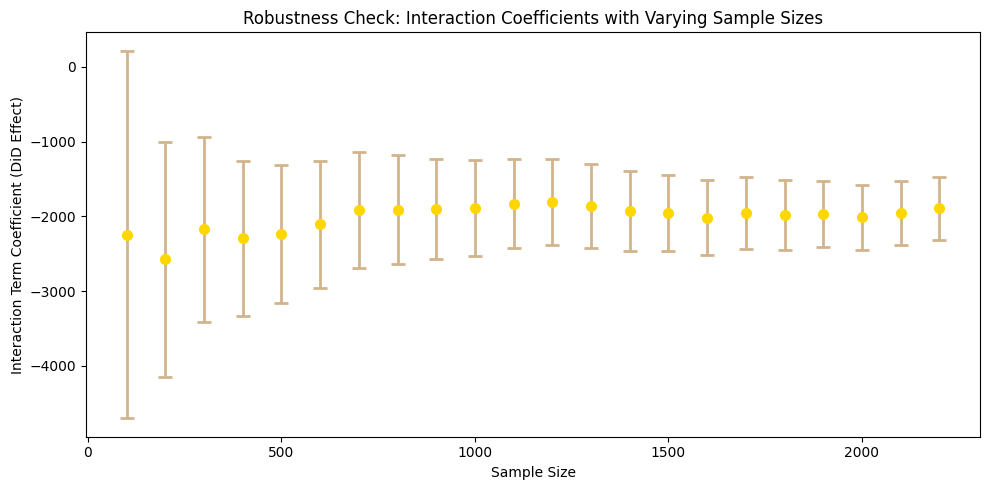

In [29]:
sample_sizes = range(100, 2201, 100)

coefs = []
conf_lows = []
conf_highs = []

for n in sample_sizes:
    coef, conf_low, conf_high = did_sample(n)
    coefs.append(coef)
    conf_lows.append(coef - conf_low)
    conf_highs.append(conf_high - coef)

fig, ax = plt.subplots(figsize=(10, 5))
x = np.array(sample_sizes)

ax.errorbar(x, coefs, yerr=[conf_lows, conf_highs], fmt='o', color='gold', ecolor='tan', capsize=5, elinewidth=2, markeredgewidth=2)

ax.set_xlabel('Sample Size')
ax.set_ylabel('Interaction Term Coefficient (DiD Effect)')
ax.set_title('Robustness Check: Interaction Coefficients with Varying Sample Sizes')

plt.tight_layout()
plt.show()

This robustness check assesses the stability of the interaction coefficient (DiD effect) as the sample size increases from 100 to 2200. The plot shows the interaction coefficients and their associated confidence intervals for different sample sizes, with the sample sizes represented on the x-axis and the estimated coefficients on the y-axis. **The interaction term remains relatively consistent across varying sample sizes, with coefficients stabilizing as sample size increases.** The confidence intervals also become narrower as the sample size increases, indicating increased precision of the coefficient estimates. 

This suggests that the DiD results are robust to changes in sample size, and larger samples provide more reliable estimates. However, the coefficients are consistently negative, indicating a persistent negative effect.

## **4.2 Sensitivity Check**

### **4.2.1 Using Different Definitions**

Additionally, I use data based on an alternative definition of misinformation to assess robustness.

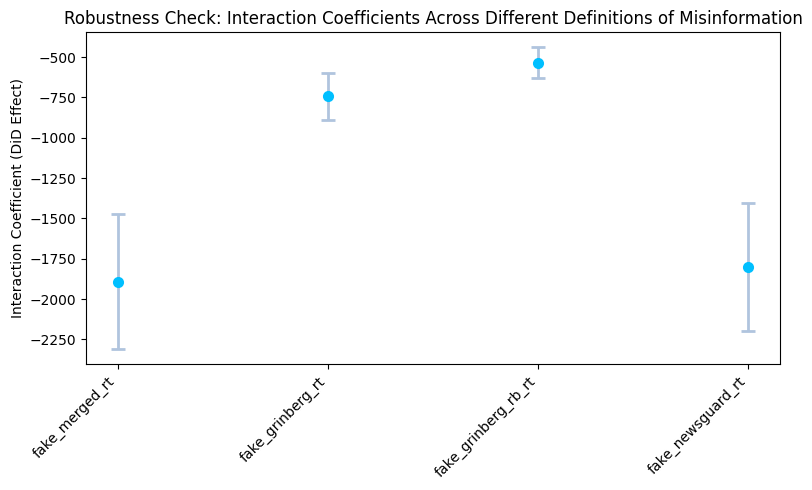

In [30]:
definitions = ['fake_merged_rt', 'fake_grinberg_rt', 'fake_grinberg_rb_rt', 'fake_newsguard_rt']

results = []

for definition in definitions:
    coef, conf_low, conf_high = did_subgroup(outcome=definition)
    results.append({'definition': definition, 'coef': coef, 'conf_low': conf_low, 'conf_high': conf_high})

labels = [result['definition'] for result in results]
coefs = [result['coef'] for result in results]
conf_lows = [result['coef'] - result['conf_low'] for result in results]
conf_highs = [result['conf_high'] - result['coef'] for result in results]

fig, ax = plt.subplots(figsize=(8, 5))
x = np.arange(len(labels))

ax.errorbar(x, coefs, yerr=[conf_lows, conf_highs], fmt='o', color='deepskyblue', ecolor='lightsteelblue', capsize=5, elinewidth=2, markeredgewidth=2)

ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha="right")
ax.set_ylabel('Interaction Coefficient (DiD Effect)')
ax.set_title('Robustness Check: Interaction Coefficients Across Different Definitions of Misinformation')

plt.tight_layout()
plt.show()

The interaction coefficients vary significantly across these definitions, indicating that **the treatment effect is sensitive to how misinformation is defined**. The larger confidence intervals, especially for some definitions, reflect greater uncertainty in estimating the effect. These results suggest that the effect of the intervention on misinformation retweets may depend on the criteria used to classify content as misinformation. This variability underscores the importance of robustness checks to ensure that results hold across different definitions of key variables.

### **4.2.2 Alternate time window**

To check the DiD model's sensitivity, I alter the time window of pre- and post- treatment.

In [31]:
def sensitivity_check(pre_start=pd.to_datetime('2019-11'), post_end=pd.to_datetime('2021-05')):

    df_sensitivity = df_did[(df_did['date'] >= pre_start) & (df_did['date'] <= post_end)]

    X = sm.add_constant(df_sensitivity[['treatment', 'post', 'interaction']])
    y = df_sensitivity['fake_merged_rt']

    model = sm.OLS(y, X).fit()

    return model.params['interaction']  


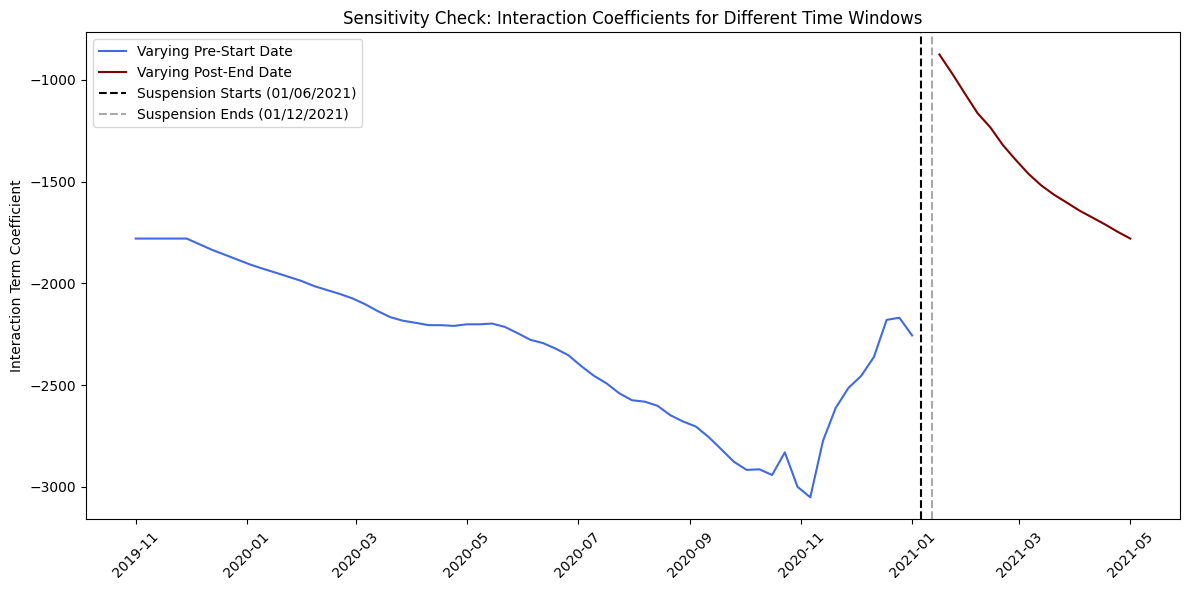

In [32]:
# Lists to store sensitivity results
pre_start_results = []
pre_start_dates = []

post_end_results = []
post_end_dates = []

# Sensitivity checks for varying pre-treatment start dates
pre_start = pd.to_datetime('2019-11')
while pre_start <= pd.to_datetime('2021-01-06'):
    coef = sensitivity_check(pre_start=pre_start)
    pre_start_results.append(coef)
    pre_start_dates.append(pre_start)
    pre_start = pre_start + pd.DateOffset(weeks=1)

# Sensitivity checks for varying post-treatment end dates
post_end = pd.to_datetime('2021-05')
while post_end >= pd.to_datetime('2021-01-12'):
    coef = sensitivity_check(post_end=post_end)
    post_end_results.append(coef)
    post_end_dates.append(post_end)
    post_end = post_end - pd.DateOffset(weeks=1)

# Plotting the sensitivity check results
fig, ax = plt.subplots(figsize=(12, 6))

# Plot for pre-treatment start date sensitivity
ax.plot(pre_start_dates, pre_start_results, label='Varying Pre-Start Date', color='royalblue')

# Plot for post-treatment end date sensitivity
ax.plot(post_end_dates, post_end_results, label='Varying Post-End Date', color='maroon')

# Formatting the plot
ax.set_ylabel('Interaction Term Coefficient')
ax.set_title('Sensitivity Check: Interaction Coefficients for Different Time Windows')
suspension_period()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The sensitivity check shows the variation of the interaction term's coefficient as the pre-treatment start date (`pre_start`) and post-treatment end date (`post_end`) are adjusted. Specifically, the blue line represents changes in the coefficient when moving the pre-treatment start date forward from November 2019, while the red line represents changes in the coefficient when moving the post-treatment end date backward from May 2021.

**Blue Line - Varying Pre-Start Date:**

As the pre-treatment start date (`pre_start`) is gradually moved forward from November 2019, the coefficient of the interaction term exhibits a downward trend. Initially, the coefficient is close to -2000, and it enlarges further as the start date approaches the suspension period in early 2021.

**Red Line - Varying Post-End Date:**

As the post-treatment end date (`post_end`) is moved backward from May 2021 towards February 2021, the coefficient increase. The sensitivity of the model to the post-treatment window indicates that the impact of deplatforming is observed to be less when the window is shortened to exclude later observations.

**Conclusion:**

The sensitivity analysis reveals that the observed difference-in-differences effect is sensitive to the choice of pre- and post-treatment windows. The strong negative and positive trend in the coefficient as the pre-treatment and post-treatment periods are adjusted highlights the importance of careful selection of the analysis period.

---

# **Section 5** Conclusions and Reflections

## **5.1 Is the current dataset sufficient to offer insight into this question? What are some key limitations of the dataset, and key merits?**

### **5.1.1 Dataset Sufficiency**

Based on my reasearch, the dataset is sufficient for researching this question.

- **Sufficient Subgroups**: The dataset has sufficient subgroups (e.g., Trump-only followers, followers of different engagement levels) that allow for analyzing the heterogeneity of the deplatforming effects. This helps in understanding whether the effect is different for varying user groups.

- **Different Measurements**: There are multiple measures of misinformation included in the dataset, such as misinformation-related retweets from various definitions (e.g., fake_merged_rt, fake_grinberg_rt). These help validate the robustness of findings and provide insights into how deplatforming affects different types of misinformation.

- **Full Time Series**: The dataset includes a full time series that spans before, during, and after the deplatforming event. This allows for effective use of the DiD method and for identifying trends and abrupt changes in user behavior due to deplatforming.

### **5.1.2 Dataset Limitations**

The dataset provides a good starting point to explore the effects of deplatforming, particularly in examining behavior changes among different user subgroups over time. However, there are several key limitations:

- **Lack of Demographic Information**: In the paper, McCabe et al. explore users' demographic features to understand the effects of deplatforming better. However, the dataset used in my analysis does not include such demographic details, which limits the ability to analyze how factors like age, gender, or political orientation may influence users' behavior in spreading or reacting to misinformation.

- **Short-term Behavior**: The dataset focuses on short-term changes in behavior following deplatforming. It does not provide insights into long-term effects, such as whether deplatformed users rejoin the platform under different accounts or whether misinformation resurges after a certain period.

- **No External Influence**: The analysis does not account for external events that could affect user behavior, such as major news events, shifts in platform policies, or the influence of other social media platforms. These factors could confound the observed effects, making it difficult to attribute changes in misinformation levels solely to deplatforming.

- **Network Dynamics Ignored**: The dataset does not adequately capture the full network dynamics of how misinformation spreads through retweets, likes, and other social network behaviors. Understanding these dynamics is critical for determining how influential a deplatformed user was and how information flows in their absence.

## **5.2 Is the DiD method sufficient to support strong conclusions related to this question?**

Based on my analysis, the results suggest that **deplatforming reduced misinformation on Twitter**, particularly for the followers of deplatformed users. Across various analyses—such as the Difference-in-Differences (DiD) approach and multiple sensitivity checks—there was a consistent reduction in misinformation-related content following the suspension of high-profile accounts.

Specifically, the effect of deplatforming includes direct and spillover effect:

- **Direct Effect**: The direct effect of deplatforming refers to the immediate reduction in the capacity of deplatformed users to share content. When influential users who spread misinformation are suspended, they lose access to their audience, preventing them from directly disseminating misinformation. This is observed in my analysis, where the misinformation-related content from deplatformed accounts dropped to zero after they were suspended.

- **Spillover Effect**: In my analysis, this includes the effect on followers of deplatformed users who is not suspended. Spillover effects can manifest in two different ways:
  - **Reduction in Misinformation Sharing**: Followers of deplatformed users may reduce their engagement with misinformation due to the absence of influential content generators.
  - **Behavioral Change**: The spillover effect could also include behavioral shifts where users become more cautious about sharing misinformation out of fear of also being suspended.

## **5.3 Overall, do you think the conclusions of McCabe et al. (2024) are justified?**

According to the paper, I do think the conclusions by McCabe et al. (2024) is justified.

- **Natural Experiment**: The natural experiment aspect of McCabe et al.'s (2024) study is a key strength, as it allows for more robust causal inferences regarding the effect of deplatforming on misinformation. The deplatforming event, triggered by the January 6th insurrection, was exogenous to individual user behaviors, meaning it was not influenced by the actions of specific users. This abrupt policy decision created a clear before-and-after scenario, which is ideal for Difference-in-Differences (DiD) analysis.

- **SRD and DiD**: Another strength of the study by McCabe et al. (2024) lies in the complementary use of SRD and DiD methods. Both approaches provide robust ways to estimate the impact of deplatforming, and since the results from both methods align, it increases confidence in the robustness of the findings. The use of different methods helps to minimize biases that could arise from any single analytical approach, thereby providing a stronger foundation for the causal conclusions regarding the effect of deplatforming on misinformation.

My findings also support the conclusions of McCabe et al. (2024) to a significant extent.

- **Direct Effect**: My Difference-in-Differences (DiD) analysis suggests that the deplatforming event significantly reduced the spread of misinformation among the users who were directly affected (those who followed deplatformed accounts or were otherwise influenced by them). This supports the paper’s claim that deplatforming had a direct effect in reducing the reach of misinformation on Twitter.

- **Spillover Effect**: The additional subgroup analyses in my notebook also indicate potential spillover effects, where the reduction in misinformation-sharing was also observable among users who were not directly deplatformed. This matches the findings from McCabe et al. (2024) about broader impacts of deplatforming beyond the users who were explicitly targeted.

## **5.4 More generally, do you feel that misinformation on social media is a substantial threat to discourse and society that data science can address, and how has this project influenced your view?**

I believe misinformation on social media is a substantial threat to society and needs proactive solutions from both platforms and policymakers. The impact of misinformation varies by context and type, requiring tailored approaches to effectively mitigate its influence:

- **Political Misinformation**: Political misinformation has the potential to destabilize democratic processes and influence elections. Platforms should strive for neutrality when moderating political content to avoid accusations of bias, but they must still prevent the spread of clearly false or misleading information that could harm democratic discourse.

- **Scientific Misinformation**: Scientific misinformation, especially in the medical field (e.g., misinformation about vaccines or treatments), can be directly harmful to public health. Social media platforms should enforce strict policies against such content, including banning accounts that repeatedly share harmful misinformation.

- **Entertainment Misinformation**: Misinformation related to celebrities or entertainment topics generally poses less of a societal threat. Platforms may deprioritize this type of content, as its impact is more contained. However, they should still monitor and take action if misinformation begins to escalate or cause harm.

- **Social Misinformation**: Misinformation that directly affects communities and individuals socially (e.g., hoaxes or false accusations) can cause real harm. Platforms should leverage user reports to identify potentially damaging content, and provide warning tags or additional context for posts flagged by many users.

- **AI-Generated Content**: As AI-generated content becomes more common, it's important to ensure transparency. Content identified as AI-generated should include a disclaimer, such as “This might contain AI-generated content,” to help users understand its potential origins and evaluate its credibility appropriately.

This project has influenced my perspective from the following ways:

- **Observability and Measurability**: I have learned that the regulation of misinformation is quantifiable using data science. Techniques like Difference-in-Differences (DiD) allow us to measure the impact of interventions like deplatforming.

- **Spillover Effects**: Regulations, such as banning misinformation spreaders, can have a spillover effect that reduces misinformation posts even from accounts that were not directly banned. This highlights the broader impact that targeted actions can have on overall platform behavior.

- **Demographic Sensitivity**: Misinformation spreaders often have specific demographic characteristics, but targeting these users could lead to unintended discrimination. As a data scientist analyzing such sensitive topics, I need to be careful to avoid reinforcing biases or implementing solutions that could inadvertently harm particular groups.

---

# **Section 6** Use of External Resources

`[x]` I made use of a coding assistant such as ChatGPT or other large language models to complete this assignment.

If you select this option, you are required to include a record of your interaction with the coding assistant here. Please include in the cell below either a link to the transcript or the transcript itself. If you provide a link, it is your responsibility to ensure that the link works and can be accessed by the graders. 

### Transcript

**I used Grammarly in writing.**

**ChatGPT**: https://chatgpt.com/c/67101cbf-7008-8003-ae2f-88916e4442e6